# Training and Running a linear model using Scikit

In [68]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors

In [69]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [71]:
# Load the data
oecd_bli = pd.read_csv("oecd_bli_2020.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv", thousands=',', 
                    delimiter='\t', encoding='latin1', na_values='n/a')

FileNotFoundError: [Errno 2] File b'oecd_bli_2020.csv' does not exist: b'oecd_bli_2020.csv'

In [59]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

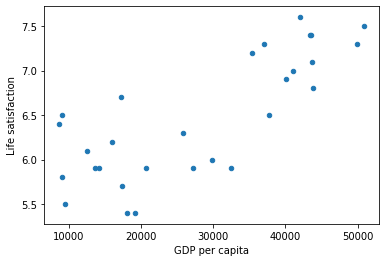

In [60]:
# Visualize the data
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

In [61]:
# Select a model
# model = sklearn.linear_model.LinearRegression()
model2 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)


In [65]:

# Train model
model2.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [66]:
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus GDP per capita
print(model2.predict(X_new))

[[5.86666667]]
